In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
plt.style.use('seaborn')
from scipy.ndimage.filters import gaussian_filter1d
import os
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_DIR = '/content/drive/My Drive/4th Year/CS 197 (Thesis)/FINAL - COVID Modeling/notebooks/'
file_path = os.path.join(BASE_DIR, 'data/normalized_5day_moving.csv')
df = pd.read_csv(file_path, index_col=0)

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,populations,area,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,38928346.0,no province Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.137644e-09,5.137644e-09,5.137644e-09,5.137644e-09,5.137644e-09,...,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000002,0.000002,0.000002,0.000002,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,0.000003,0.000002,0.000003,0.000002,0.000002,0.000003,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,0.000004,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000006
1,no province,Albania,41.15330,20.168300,2877797.0,no province Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000059,0.000062,0.000068,0.000077,0.000084,0.000091,0.000097,0.000100,0.000101,0.000103,0.000104,0.000105,0.000105,0.000104,0.000103,0.000103,0.000101,0.000103,0.000099,0.000102,0.000103,0.000110,0.000116,0.000128,0.000140,0.000152,0.000160,0.000169,0.000179,0.000180,0.000174,0.000173,0.000174,0.000176,0.000183,0.000203,0.000211,0.000219,0.000225,0.000241
2,no province,Algeria,28.03390,1.659600,43851044.0,no province Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.560895e-09,4.560895e-09,4.560895e-09,4.560895e-09,...,0.000003,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.000007,0.000008,0.000009,0.000010,0.000012,0.000013,0.000014,0.000014,0.000015,0.000016,0.000017,0.000018,0.000019,0.000019,0.000020,0.000020,0.000021,0.000021,0.000022,0.000023
3,no province,Andorra,42.50630,1.521800,77265.0,no province Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001105,0.001279,0.001279,0.001763,0.000989,0.000989,0.001121,0.001121,0.001123,0.001123,0.001711,0.001074,0.001074,0.001330,0.001551,0.001240,0.001369,0.001623,0.001116,0.001074,0.000960,0.000888,0.000984,0.000981,0.000802,0.001116,0.001224,0.001015,0.000885,0.001118,0.000769,0.000885,0.000745,0.001022,0.000898,0.000867,0.000731,0.000975,0.000511,0.000479
4,no province,Angola,-11.20270,17.873900,32866272.0,no province Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000004,0.000005,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.000008,0.000008,0.000008,0.000008,0.000008,0.000007,0.000007,0.000007,0.000007,0.000008,0.000008,0.000008,0.000007,0.000007,0.000005,0.000005,0.000004,0.000004,0.000004,0.000005,0.000004,0.000004,0.000004,0.000005,0.000004,0.000005,0.000006,0.000006


# Graph Functions

In [6]:
# Single country / Multiple countries
def get_graph(df, country='Philippines', index=None, startc=7, endc=None):
  try:
    if index:
      df_country = df.loc[index]
    else:
      if isinstance(country, str):
        df_country = df[df['Country/Region'] == country]
      else:
        df_country = df[df['Country/Region'].isin(country)]
  
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    fig.suptitle(df_country['area'].values[0], fontsize=16)
    ax.set_xlabel("Dates")
    ax.set_ylabel("Cases")
    ax.get_xaxis().set_ticks([])
    # ax.get_yaxis().set_ticks([])

    if endc:
      x = df_country.columns[startc:-endc]
    else:
      x = df_country.columns[startc:]
    y = df_country[x]

    for idx, row in y.iterrows():
      ax.plot(x, row)

    fig.legend(df_country['area'])

    # ax.plot(x,y)
  except IndexError:
    # No South Korea in the dataset
    print("Country is not in the dataset")

In [9]:
# All countries
def get_graphs(df, areas=['no province Philippines']):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Cases")
  for area in areas:
    try:
        df_area = df[df['area'] == area]
        x = df_area.columns[5:-1]
        y=[]
        for i in x:
          y.append(df_area[i].values.sum())
        
        ax.plot(x,y,label=area)
        #comment out the line below to remove the labels of the area names.
        ax.legend()
    except IndexError:
        print("area is not in the dataset")

In [10]:
import math

# Multiple countries
def compare_graphs(df, range_of_index=(0,10), num_rows=4, figsize=(10,10)):
  start_index = range_of_index[0]
  end_index = range_of_index[1]
  df_country = df.loc[start_index:end_index]
  num_cols = math.ceil(df_country.shape[0] / num_rows)

  fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
  fig.suptitle('Countries from {} to {}'.format(df_country.loc[start_index, 'area'], df_country.loc[end_index, 'area'], fontsize=16))
  x = df.columns[5:-1]
  ctr = 0

  for i in range(num_rows):
    for j in range(num_cols):
      if start_index + ctr <= end_index:
        try:
          curr_country = df_country.loc[start_index + ctr]
          y = [curr_country[i] for i in x]
          axs[i, j].plot(x, y)
          axs[i, j].set_title(curr_country['area'])
          axs[i, j].get_xaxis().set_ticks([])
          axs[i, j].get_yaxis().set_ticks([])
          ctr += 1
        except KeyError:
          axs[i, j].axis('off')
      else:
        axs[i, j].axis('off')

# Test Countries

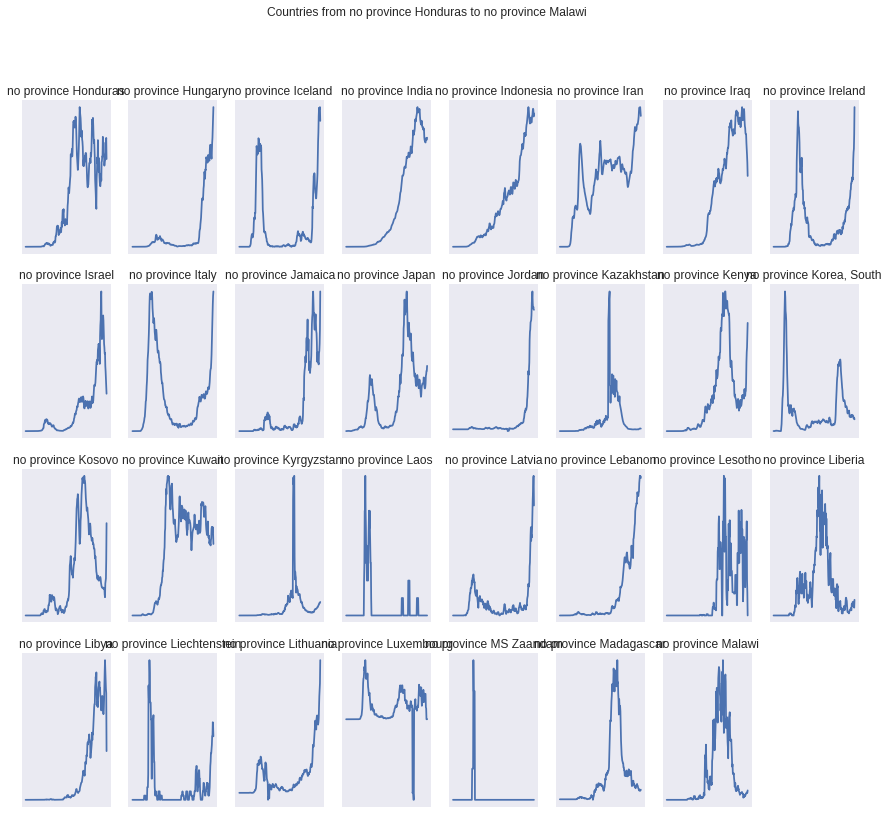

In [ ]:
compare_graphs(df, range_of_index=(140,170), figsize=(15,13))

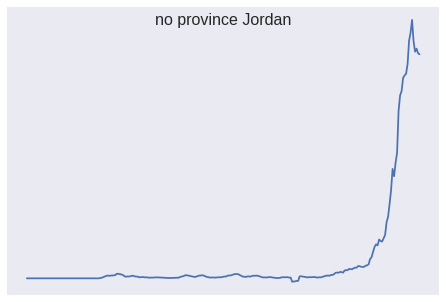

In [ ]:
get_graph(df, country='Jordan')

In [ ]:
df[df['Country/Region']=='Jordan']

,Province/State,Country/Region,Lat,Long,populations,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,area
152,no province,Jordan,31.24,36.51,10228864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000007,0.000007,0.000008,0.00001,0.000011,0.000014,0.000017,0.000018,0.000018,0.000021,0.00002,0.00002,0.000022,0.000023,0.00003,0.000033,0.00004,0.000048,0.000059,0.000055,0.000062,0.000068,0.00009,0.000099,0.000101,0.000108,0.000109,0.00011,0.000115,0.000128,0.000132,0.000139,0.000128,0.000122,0.000124,0.000121,0.000121,no province Jordan


In [ ]:
for cols in df.columns[6:-1]:
    if df[cols][152]<0:
        print(cols, df[cols][152])

7/17/20 -1.8183837423197726e-06
7/18/20 -1.7401736888866643e-06
7/19/20 -1.6228586087370016e-06
7/20/20 -1.4077809617959532e-06
7/21/20 -1.3491234217211218e-06


# Smoothing the Curve

In [7]:
def smooth_data(df, NUM_DAYS=7):
  new_df = df.copy()
  dates = df.columns[6:-1]

  for idx, date in enumerate(dates):
    seven_days = dates[idx : idx+NUM_DAYS]
    new_df[date] = df.apply(lambda x: x[seven_days].mean(), axis=1)
  
  return new_df

In [8]:
new_df_1 = smooth_data(df)
new_df_1.head()

,Province/State,Country/Region,Lat,Long,populations,area,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,38928346.0,no province Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.339492e-10,1.467898e-09,2.201848e-09,2.935797e-09,3.669746e-09,3.669746e-09,3.669746e-09,2.935797e-09,2.201848e-09,1.467898e-09,7.339492e-10,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006
1,no province,Albania,41.15330,20.168300,2877797.0,no province Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000077,0.000083,0.000088,0.000093,0.000097,0.000100,0.000102,0.000103,0.000103,0.000104,0.000104,0.000103,0.000103,0.000102,0.000102,0.000103,0.000105,0.000109,0.000114,0.000122,0.000130,0.000139,0.000149,0.000158,0.000165,0.000170,0.000173,0.000175,0.000177,0.000180,0.000185,0.000191,0.000199,0.000203,0.000208,0.000214,0.000218,0.000222,0.000225,0.000241
2,no province,Algeria,28.03390,1.659600,43851044.0,no province Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,6.515564e-10,1.303113e-09,1.954669e-09,2.606226e-09,3.257782e-09,3.257782e-09,4.560895e-09,6.515564e-09,1.303113e-08,1.954669e-08,...,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.000008,0.000008,0.000009,0.000010,0.000011,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.000018,0.000019,0.000020,0.000020,0.000020,0.000021,0.000021,0.000021,0.000021,0.000022,0.000023
3,no province,Andorra,42.50630,1.521800,77265.0,no province Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.697849e-07,7.395698e-07,1.109355e-06,1.479140e-06,...,0.001218,0.001220,0.001198,0.001176,0.001168,0.001180,0.001193,0.001223,0.001284,0.001301,0.001336,0.001323,0.001329,0.001329,0.001276,0.001181,0.001145,0.001089,0.000972,0.000972,0.000994,0.001001,0.001001,0.001020,0.000990,0.001002,0.000949,0.000920,0.000903,0.000901,0.000846,0.000875,0.000822,0.000834,0.000797,0.000771,0.000739,0.000743,0.000511,0.000479
4,no province,Angola,-11.20270,17.873900,32866272.0,no province Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000005,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.000008,0.000008,0.000008,0.000008,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000006,0.000006,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.0000

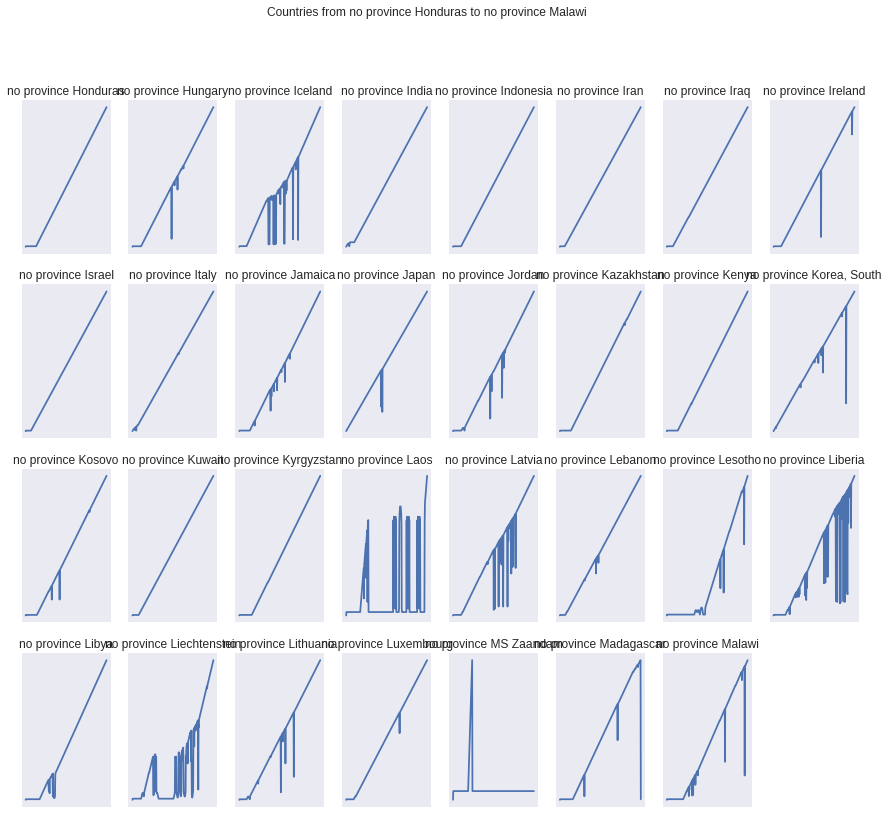

In [11]:
compare_graphs(new_df_1, range_of_index=(140,170), figsize=(15,13))

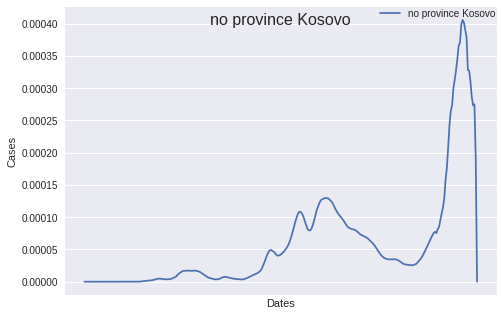

In [12]:
get_graph(new_df_1, country='Kosovo')

In [13]:
new_df_2 = smooth_data(new_df_1)
new_df_2.head()

,Province/State,Country/Region,Lat,Long,populations,area,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,38928346.0,no province Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.048499e-10,3.145497e-10,6.290993e-10,1.048499e-09,1.572748e-09,2.096998e-09,2.621247e-09,2.935797e-09,3.040647e-09,2.935797e-09,2.621247e-09,2.096998e-09,1.572748e-09,1.363049e-09,1.572748e-09,2.306697e-09,3.774596e-09,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006
1,no province,Albania,41.15330,20.168300,2877797.0,no province Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.836637e-09,1.985646e-08,5.389610e-08,...,0.000091,0.000095,0.000098,0.000100,0.000102,0.000103,0.000103,0.000103,0.000103,0.000103,0.000103,0.000104,0.000105,0.000108,0.000112,0.000117,0.000124,0.000132,0.000140,0.000147,0.000155,0.000161,0.000167,0.000171,0.000175,0.000179,0.000183,0.000187,0.000192,0.000197,0.000203,0.000208,0.000213,0.000215,0.000218,0.000220,0.000222,0.000224,0.000225,0.000241
2,no province,Algeria,28.03390,1.659600,43851044.0,no province Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,9.307949e-11,2.792385e-10,5.584769e-10,9.307949e-10,1.396192e-09,1.861590e-09,2.513146e-09,3.350862e-09,5.026292e-09,7.539438e-09,1.135570e-08,1.628891e-08,2.252524e-08,2.913388e-08,3.583560e-08,4.086189e-08,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000008,0.000008,0.000009,0.000010,0.000010,0.000011,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.000018,0.000019,0.000019,0.000020,0.000020,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000022,0.000022,0.000023
3,no province,Andorra,42.50630,1.521800,77265.0,no province Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.282641e-08,1.584792e-07,3.169585e-07,5.282641e-07,7.923962e-07,1.056528e-06,1.320660e-06,1.479140e-06,1.531966e-06,1.479140e-06,...,0.001193,0.001194,0.001203,0.001218,0.001241,0.001263,0.001284,0.001303,0.001311,0.001296,0.001274,0.001239,0.001189,0.001138,0.001090,0.001051,0.001025,0.001007,0.000993,0.000997,0.000994,0.000983,0.000969,0.000955,0.000930,0.000914,0.000888,0.000871,0.000854,0.000835,0.000812,0.000797,0.000745,0.000733,0.000712,0.000691,0.000665,0.000627,0.000511,0.000479
4,no province,Angola,-11.20270,17.873900,32866272.0,no province Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000006,0.000006,0.000007,0.000007,0.000007,0.000007,0.0000

In [14]:
new_df_3 = smooth_data(new_df_2)
new_df_4 = smooth_data(new_df_3)
new_df_5 = smooth_data(new_df_4)

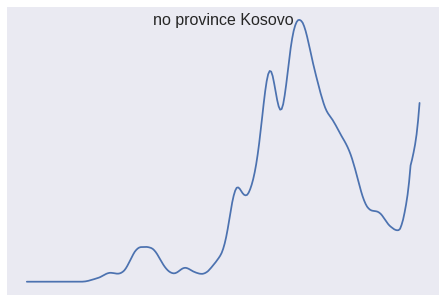

In [ ]:
get_graph(new_df_2, country='Kosovo')

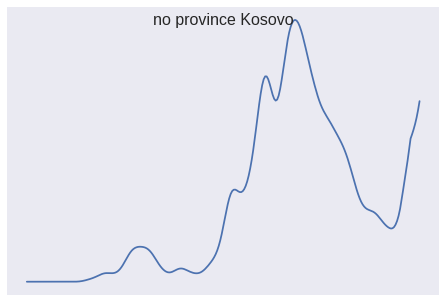

In [ ]:
get_graph(new_df_3, country='Kosovo')

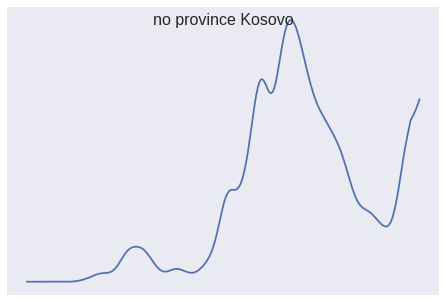

In [ ]:
get_graph(new_df_4, country='Kosovo')

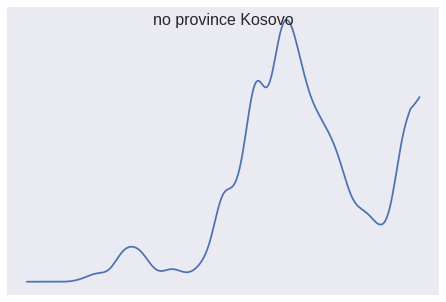

In [ ]:
get_graph(new_df_5, country='Kosovo')

In [ ]:
new_df_5.to_csv(os.path.join(BASE_DIR, 'data/normalized_confirmed.csv'))